In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def validate(path, file_name, model):

    def oracle(asg):
        loc = 0
        for cls in cnf:
            for lit in cls:
                if lit in asg:
                    loc += 1
                    break
        return loc

    n, m, cnf, mod = 0, 0, [], []
    with open(path + file_name, 'r') as cnf_file:
        lines = cnf_file.readlines()
        for line in filter(lambda x: not x.startswith('c'), lines):
            if line.startswith('p cnf'):
                header = line[6:].split(' ')
                if '' in header:
                    header = list(filter(lambda item: item != '', header))
                n, m = list(map(int, line[6:].split(' ')))
            else:
                clause = line.rstrip('\n')[:-2].split(' ')
                if '' in clause:
                    clause.remove('')
                cnf.append(list(map(int, clause)))

    mod = [+(i + 1) if bit else -(i + 1) for i, bit in enumerate(map(int, model))]
    
    return oracle(mod) / m

In [3]:
st2015_1 = pd.read_csv("sr15bench/sr2015_1st_order.csv", header=None)

st2015_sat_instances = list(list(zip(*pd.read_csv("sats.list", header=None).to_numpy()))[0])
st2015_unsat_instances = list(list(zip(*pd.read_csv("unsats.list", header=None).to_numpy()))[0])
st2015_unknown_instances = list(list(zip(*pd.read_csv("unsolved.list", header=None).to_numpy()))[0])

st2015_1_sat = st2015_1[st2015_1[0].isin(st2015_sat_instances)]
st2015_1_unsat = st2015_1[st2015_1[0].isin(st2015_unsat_instances)]
st2015_1_unknown = st2015_1[st2015_1[0].isin(st2015_unknown_instances)]

In [4]:
st2018_1 = pd.read_csv("sr18bench/sr2018_1st_order.csv", header=None)

st2018_data = pd.read_csv("sr2018.csv")

st2018_sat_instances = [name.replace('sat/', '').replace('.bz2', '') for name in st2018_data[st2018_data['result'].str.contains('SAT-VERIFIED')]['benchmark'].unique()]
st2018_unsat_instances = [name.replace('sat/', '').replace('.bz2', '') for name in st2018_data[st2018_data['result'].str.contains('UNSAT')]['benchmark'].unique()]
st2018_unknown_instances = [name.replace('sat/', '').replace('.bz2', '') for name in st2018_data[st2018_data['result'].str.contains('UNKNOWN')]['benchmark'].unique()]

st2018_1_sat = st2018_1[st2018_1[0].isin(st2018_sat_instances)]
st2018_1_unsat = st2018_1[st2018_1[0].isin(st2018_unsat_instances)]
st2018_1_unknown = st2018_1[st2018_1[0].isin(st2018_unknown_instances)]

In [5]:
st2019_1 = pd.read_csv("sr19bench/sr2019_1st_order.csv", header=None)

st2019_data = pd.read_csv("sr2019.csv")

st2019_sat_instances = [name.replace('sat/', '').replace('.bz2', '') for name in st2019_data[st2019_data['result'].str.contains('SAT-VERIFIED')]['benchmark'].unique()]
st2019_unsat_instances = [name.replace('sat/', '').replace('.bz2', '') for name in st2019_data[st2019_data['result'].str.contains('UNSAT')]['benchmark'].unique()]
st2019_unknown_instances = [name.replace('sat/', '').replace('.bz2', '') for name in st2019_data[st2019_data['result'].str.contains('UNKNOWN')]['benchmark'].unique()]

st2019_1_sat = st2019_1[st2019_1[0].isin(st2019_sat_instances)]
st2019_1_unsat = st2019_1[st2019_1[0].isin(st2019_unsat_instances)]
st2019_1_unknown = st2019_1[st2019_1[0].isin(st2019_unknown_instances)]

In [6]:
SAT = pd.concat([st2015_1_sat, st2018_1_sat, st2019_1_sat])
UNSAT = pd.concat([st2015_1_unsat, st2018_1_unsat, st2019_1_unsat])
SAT_INSTANCES = st2015_sat_instances + st2018_sat_instances + st2019_sat_instances
UNSAT_INSTANCES = st2015_unsat_instances + st2018_unsat_instances + st2019_unsat_instances
ALL = pd.concat([SAT, UNSAT])

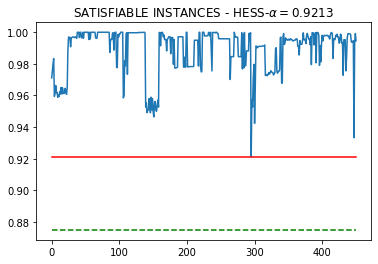

In [7]:
plt.clf()
plt.title(r'SATISFIABLE INSTANCES - HESS-$\alpha=${:.4f}'.format(SAT[5].min()))
plt.plot(list(range(SAT[5].size)), SAT[5])
plt.plot(list(range(SAT[5].size)), SAT[5].size * [SAT[5].min()], 'r-')
plt.plot(list(range(SAT[5].size)), SAT[5].size * [7/8], 'g--')
plt.savefig('all_sat.png')

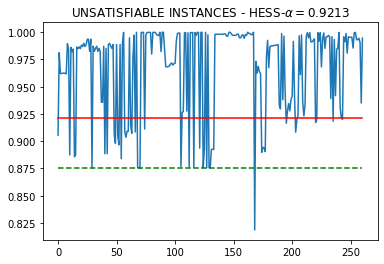

In [8]:
plt.clf()
plt.title(r'UNSATISFIABLE INSTANCES - HESS-$\alpha=${:.4f}'.format(SAT[5].min()))
plt.plot(list(range(UNSAT[5].size)), UNSAT[5])
plt.plot(list(range(UNSAT[5].size)), UNSAT[5].size * [SAT[5].min()], 'r-')
plt.plot(list(range(UNSAT[5].size)), UNSAT[5].size * [7/8], 'g--')
plt.savefig('all_unsat.png')

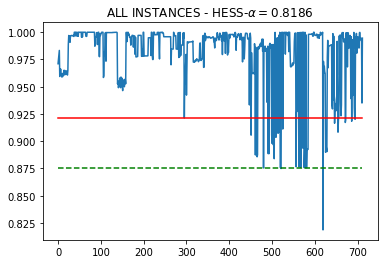

In [9]:
plt.clf()
plt.title(r'ALL INSTANCES - HESS-$\alpha=${:.4f}'.format(ALL[5].min()))
plt.plot(list(range(ALL[5].size)), ALL[5])
plt.plot(list(range(ALL[5].size)), ALL[5].size * [SAT[5].min()], 'r-')
plt.plot(list(range(ALL[5].size)), ALL[5].size * [7/8], 'g--')
plt.savefig('all_sat_unsat.png')

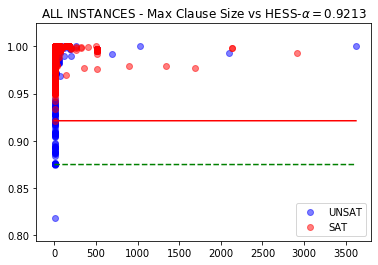

In [10]:
plt.clf()
plt.title(r'ALL INSTANCES - Max Clause Size vs HESS-$\alpha=${:.4f}'.format(SAT[5].min()))
plt.scatter(UNSAT[3], UNSAT[5], color='blue', alpha=0.5, label='UNSAT')
plt.scatter(SAT[3], SAT[5], color='red', alpha=0.5, label='SAT')
plt.plot(list(range(ALL[3].max())), ALL[3].max() * [SAT[5].min()], 'r-')
plt.plot(list(range(ALL[3].max())), ALL[3].max() * [7/8], 'g--')
plt.legend()
plt.savefig('all_max_clause_size.png')

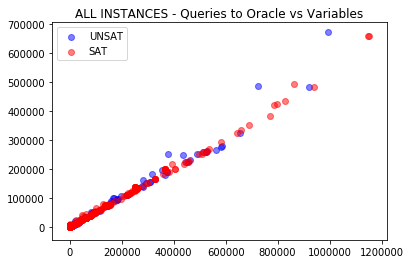

In [11]:
plt.clf()
plt.title(r'ALL INSTANCES - Queries to Oracle vs Variables'.format(SAT[5].min()))
plt.scatter(UNSAT[6], UNSAT[1], color='blue', alpha=0.5, label='UNSAT')
plt.scatter(SAT[6], SAT[1], color='red', alpha=0.5, label='SAT')
plt.legend()
plt.savefig('all_queries.png')

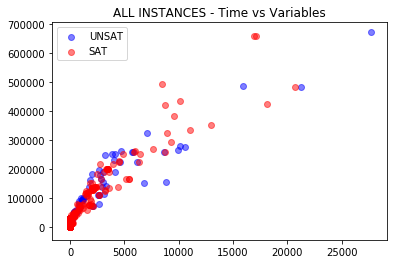

In [12]:
plt.clf()
plt.title(r'ALL INSTANCES - Time vs Variables'.format(SAT[5].min()))
plt.scatter(UNSAT[7], UNSAT[1], color='blue', alpha=0.5, label='UNSAT')
plt.scatter(SAT[7], SAT[1], color='red', alpha=0.5, label='SAT')
plt.legend()
plt.savefig('all_time.png')

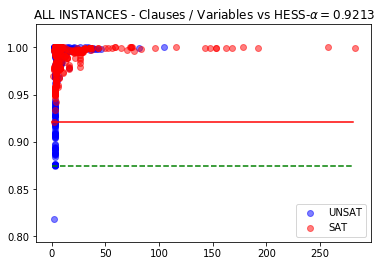

In [13]:
plt.clf()
plt.title(r'ALL INSTANCES - Clauses / Variables vs HESS-$\alpha=${:.4f}'.format(SAT[5].min()))
plt.scatter(UNSAT[4], UNSAT[5], color='blue', alpha=0.5, label='UNSAT')
plt.scatter(SAT[4], SAT[5], color='red', alpha=0.5, label='SAT')
plt.plot(list(range(int(ALL[4].max()))), int(ALL[4].max()) * [SAT[5].min()], 'r-')
plt.plot(list(range(int(ALL[4].max()))), int(ALL[4].max()) * [7/8], 'g--')
plt.legend()
plt.savefig('all_ratio.png')

In [14]:
ALL

,0,1,2,3,4,5,6,7,8
0,aes_32_3_keyfind_1.cnf,708,2664,5,3.762712,0.971096,1289,0.010213,0101111110111001110010111000010101011111101110...
1,aes_64_1_keyfind_1.cnf,596,2780,5,4.664430,0.975180,1065,0.008510,0101111111111100101110010000011111001011000011...
2,manthey_single-ordered-initialized-w12-b6.cnf,792,5055,12,6.382576,0.980020,1493,0.024936,0000000000000000000000000000000000000000000000...
3,manthey_single-ordered-initialized-w14-b7.cnf,1225,8099,14,6.611429,0.983331,2326,0.061724,0000000000000000000000000000000000000000000000...
6,jgiraldezlevy.2200.9086.08.40.81.cnf,2200,9086,3,4.130000,0.959388,4361,0.513224,1000001111110011000001001000100011001111110111...
...,...,...,...,...,...,...,...,...,...
315,Mickey_out250_known_last147_0_u.cnf,72078,586477,5,8.136699,0.993140,143330,2051.372851,0000000010000001011000001000000000000000000000...
332,UTI-20-5p0-sc2009.cnf,225296,1192799,10,5.294364,0.994558,446296,6199.623493,0011000000010010100100000010100000110010101010...
337,b_unsat-sc2013.cnf,113407,1010625,4,8.911487,0.990559,226635,3136.301237,0000000001000000000000000000000000000000000000...
340,bob12s06-sc2013.cnf,482548,1368964,3,2.836949,0.935050,919869,21233.560583,0001111111111011111111011111011111111110110001...


In [ ]:
path = 'sr19bench/'
for cnf, model, alpha in zip(st2019_1[0], st2019_1[8], st2019_1[5]):
    try:
        print(abs(round(validate(path, cnf, model) - alpha, 2)), cnf)
    except Exception as ex:
        print('ERROR loading instance. {}'.format(ex))

In [ ]:
path = 'sr18bench/'
for cnf, model, alpha in zip(st2018_1[0], st2018_1[8], st2018_1[5]):
    try:
        print(abs(round(validate(path, cnf, model) - alpha, 2)), cnf)
    except Exception as ex:
        print('ERROR loading instance. {}'.format(ex))

In [ ]:
path = 'sr15bench/'
for cnf, model, alpha in zip(st2015_1[0], st2015_1[8], st2015_1[5]):
    try:
        print(abs(round(validate(path, cnf, model) - alpha, 2)), cnf)
    except Exception as ex:
        print('ERROR loading instance. {}'.format(ex))